In [327]:
import pandas as pd
import numpy as np

test_set = pd.read_csv('./tianchi_ad/test.txt',sep=' ')
train_set = pd.read_csv('./tianchi_ad/train.txt',sep=' ')



In [328]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18371 entries, 0 to 18370
Data columns (total 26 columns):
instance_id                  18371 non-null int64
item_id                      18371 non-null int64
item_category_list           18371 non-null object
item_property_list           18371 non-null object
item_brand_id                18371 non-null int64
item_city_id                 18371 non-null int64
item_price_level             18371 non-null int64
item_sales_level             18371 non-null int64
item_collected_level         18371 non-null int64
item_pv_level                18371 non-null int64
user_id                      18371 non-null int64
user_gender_id               18371 non-null int64
user_age_level               18371 non-null int64
user_occupation_id           18371 non-null int64
user_star_level              18371 non-null int64
context_id                   18371 non-null int64
context_timestamp            18371 non-null int64
context_page_id              18371 non-

In [329]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478138 entries, 0 to 478137
Data columns (total 27 columns):
instance_id                  478138 non-null int64
item_id                      478138 non-null int64
item_category_list           478138 non-null object
item_property_list           478138 non-null object
item_brand_id                478138 non-null int64
item_city_id                 478138 non-null int64
item_price_level             478138 non-null int64
item_sales_level             478138 non-null int64
item_collected_level         478138 non-null int64
item_pv_level                478138 non-null int64
user_id                      478138 non-null int64
user_gender_id               478138 non-null int64
user_age_level               478138 non-null int64
user_occupation_id           478138 non-null int64
user_star_level              478138 non-null int64
context_id                   478138 non-null int64
context_timestamp            478138 non-null int64
context_page_id     

In [330]:
train_set['dayofweek'] = (train_set['context_timestamp']/(60*60*24)).apply(np.floor)%7
train_set['hourofday'] = (train_set['context_timestamp']/(60*60)).apply(np.floor)%24
train_set['minofday'] = (train_set['context_timestamp']/(60)).apply(np.floor)%(24*60)


test_set['is_trade'] = -1
test_set['dayofweek'] = (test_set['context_timestamp']/(60*60*24)).apply(np.floor)%7
test_set['hourofday'] = (test_set['context_timestamp']/(60*60)).apply(np.floor)%24
test_set['minofday'] = (test_set['context_timestamp']/(60)).apply(np.floor)%(24*60)


In [331]:
(train_set['context_timestamp']/(60*60*24)).apply(np.floor).max()

17798.0

In [332]:
(test_set['context_timestamp']/(60*60*24)).apply(np.floor).max()%7

5.0

In [333]:
train_set_4_rate = train_set[train_set['dayofweek'] != 5]

In [334]:
train_set_4_rate.shape

(400644, 30)

In [335]:
# add item_id_rate
item_id_rate = train_set_4_rate.groupby(['item_id'])['is_trade'].mean().reset_index()

item_id_rate.columns = ['item_id','item_id_rate']

train_add_item_id_rate = pd.merge(train_set,item_id_rate,how='left',on=['item_id'])
test_add_item_id_rate = pd.merge(test_set,item_id_rate,how='left',on=['item_id'])




In [336]:
# add item_brand_id_rate
item_brand_id_rate = train_set_4_rate.groupby(['item_brand_id'])['is_trade'].mean().reset_index()

item_brand_id_rate.columns = ['item_brand_id','item_brand_id_rate']

train_add_item_brand_id_rate = pd.merge(train_add_item_id_rate,item_brand_id_rate,how='left',on=['item_brand_id'])
test_add_item_brand_id_rate = pd.merge(test_add_item_id_rate,item_brand_id_rate,how='left',on=['item_brand_id'])


In [337]:
# add item_city_id_rate
item_city_id_rate = train_set_4_rate.groupby(['item_city_id'])['is_trade'].mean().reset_index()

item_city_id_rate.columns = ['item_city_id','item_city_id_rate']

train_add_item_city_id_rate = pd.merge(train_add_item_brand_id_rate,item_city_id_rate,how='left',on=['item_city_id'])
test_add_item_city_id_rate = pd.merge(test_add_item_brand_id_rate,item_city_id_rate,how='left',on=['item_city_id'])


In [338]:
# add user_id rate
user_id_rate = train_set_4_rate.groupby(['user_id'])['is_trade'].mean().reset_index()

user_id_rate.columns = ['user_id','user_id_rate']

train_add_user_id_rate = pd.merge(train_add_item_city_id_rate,user_id_rate,how='left',on=['user_id'])
test_add_user_id_rate = pd.merge(test_add_item_city_id_rate,user_id_rate,how='left',on=['user_id'])


In [339]:
# add shop_id rate
shop_id_rate = train_set_4_rate.groupby(['shop_id'])['is_trade'].mean().reset_index()

shop_id_rate.columns = ['shop_id','shop_id_rate']

train_add_shop_id_rate = pd.merge(train_add_user_id_rate,shop_id_rate,how='left',on=['shop_id'])
test_add_shop_id_rate = pd.merge(test_add_user_id_rate,shop_id_rate,how='left',on=['shop_id'])

In [340]:
# add minofday rate
minofday_rate = train_set_4_rate.groupby(['minofday'])['is_trade'].mean().reset_index()

minofday_rate.columns = ['minofday','minofday_rate']

train_all = pd.merge(train_add_shop_id_rate,minofday_rate,how='left',on=['minofday'])
test_all = pd.merge(test_add_shop_id_rate,minofday_rate,how='left',on=['minofday'])

In [341]:
test_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18371 entries, 0 to 18370
Data columns (total 36 columns):
instance_id                  18371 non-null int64
item_id                      18371 non-null int64
item_category_list           18371 non-null object
item_property_list           18371 non-null object
item_brand_id                18371 non-null int64
item_city_id                 18371 non-null int64
item_price_level             18371 non-null int64
item_sales_level             18371 non-null int64
item_collected_level         18371 non-null int64
item_pv_level                18371 non-null int64
user_id                      18371 non-null int64
user_gender_id               18371 non-null int64
user_age_level               18371 non-null int64
user_occupation_id           18371 non-null int64
user_star_level              18371 non-null int64
context_id                   18371 non-null int64
context_timestamp            18371 non-null int64
context_page_id              18371 non-

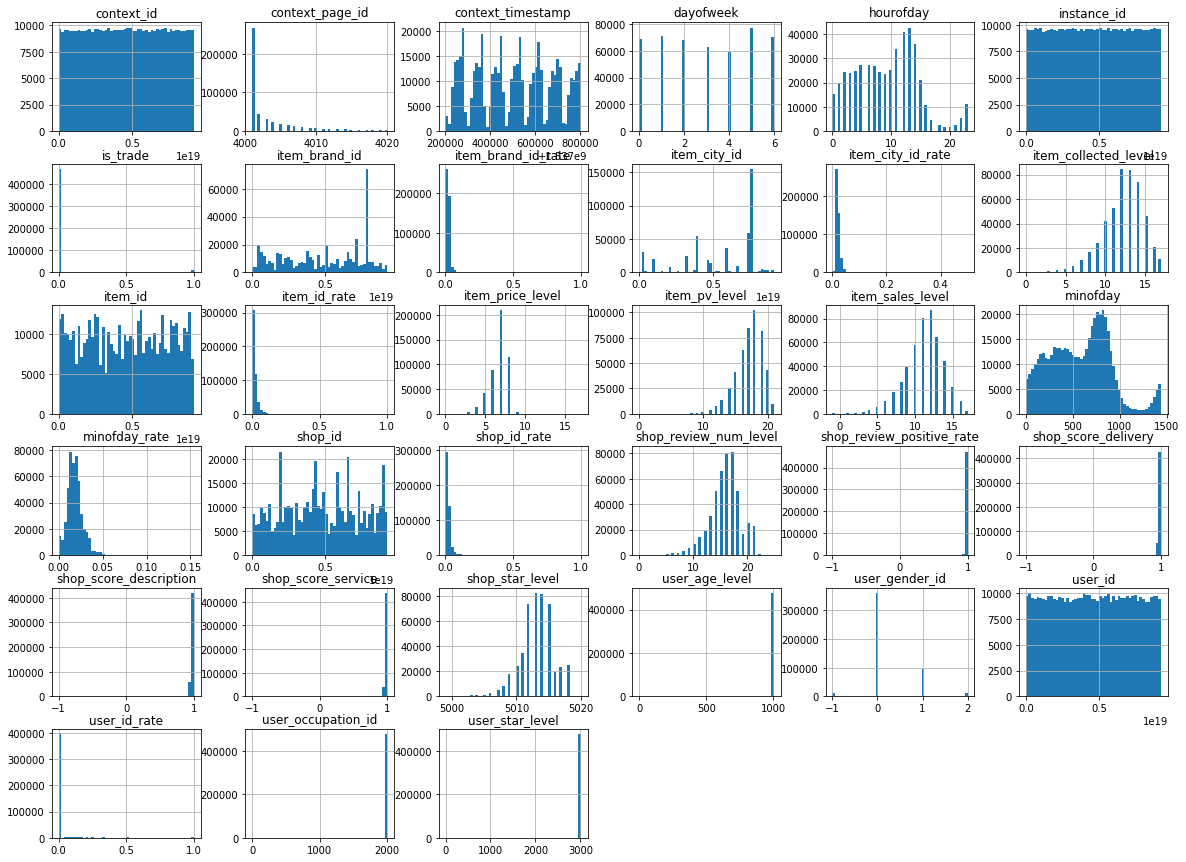

In [342]:
import matplotlib.pyplot as plt 
train_all.hist(bins=50, figsize=(20,15)) 
plt.show()

In [343]:
corr_matrix = train_all.corr()
corr_matrix["is_trade"].sort_values(ascending=False)

is_trade                     1.000000
user_id_rate                 0.695095
item_id_rate                 0.157635
shop_id_rate                 0.129387
item_brand_id_rate           0.106233
minofday_rate                0.057039
item_city_id_rate            0.050501
item_sales_level             0.037358
item_collected_level         0.013972
user_gender_id               0.008843
item_pv_level                0.006077
user_age_level               0.002628
user_star_level              0.002239
user_occupation_id           0.002026
dayofweek                    0.000912
user_id                      0.000255
item_id                     -0.000168
shop_star_level             -0.000735
shop_review_num_level       -0.000747
instance_id                 -0.002158
shop_id                     -0.003238
context_id                  -0.003459
item_brand_id               -0.005311
context_timestamp           -0.009274
context_page_id             -0.012313
item_city_id                -0.014622
shop_score_s

In [344]:
label_attrib = ['is_trade','instance_id','dayofweek']
#delete_attribs = ['instance_id','item_id','item_brand_id','item_city_id','user_id','context_id','shop_id','minofday']
text_attribs = ['item_category_list','item_property_list','predict_category_property']
# user_id_rate 空缺太多，不使用
org_attribs = ['item_id_rate','item_brand_id_rate','item_city_id_rate','shop_review_positive_rate'
               ,'shop_score_service','shop_score_delivery','shop_score_description','shop_id_rate','minofday_rate']
cat_attribs = ['item_price_level','item_sales_level','item_collected_level','item_pv_level',
               'user_gender_id','user_age_level','user_occupation_id','user_star_level','context_page_id'
               ,'shop_review_num_level','shop_star_level','dayofweek','hourofday']

In [345]:
data_all = train_all.append(test_all)

In [346]:
# 使得 cat_attribs 全为非负数 
for feature in cat_attribs:
    max_ = data_all[feature].max()
    data_all[feature] = (data_all[feature] - max_) * (-1)
    

In [347]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.pipeline import FeatureUnion 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

 
    
labels_pipeline = Pipeline([
             ('selector', DataFrameSelector(label_attrib)),
])   

org_pipeline = Pipeline([
             ('selector', DataFrameSelector(org_attribs)),
             ('imputer', Imputer(strategy="mean")),
])   


cat_pipeline = Pipeline([
             ('selector', DataFrameSelector(cat_attribs)),
             ('imputer', Imputer(strategy="most_frequent")),
             ('label_binarizer', OneHotEncoder()),
])
full_pipeline = FeatureUnion(transformer_list=[
             ("labels_pipeline", labels_pipeline),
             ("org_pipeline", org_pipeline),
             ("cat_pipeline", cat_pipeline),
])

data_prepared = full_pipeline.fit_transform(data_all)
data_prepared.shape



(496509, 212)

In [348]:
 
data_prepared_pd = pd.DataFrame(data_prepared.toarray())

In [395]:
tmp_set_s = data_prepared_pd[data_prepared_pd[0] != -1]
test_set_s = data_prepared_pd[data_prepared_pd[0] == -1]
v_set_s = tmp_set_s[tmp_set_s[2] == 5]
train_set_s = tmp_set_s[tmp_set_s[2] != 5]

# 正式训练时
train_set_s = tmp_set_s

y_train = train_set_s[[0]]#.reshape(-1,2)
y_v = v_set_s[[0]]
y_test = test_set_s[[0]]#.reshape(-1,2)

X_train = train_set_s.drop([0,1,2],axis=1)
X_v = v_set_s.drop([0,1,2],axis=1)
X_test = test_set_s.drop([0,1,2],axis=1)




In [396]:
X_test_arr = X_test.values
X_train_arr = X_train.values

In [397]:
len(X_v)

71236

In [398]:
len(X_train)

478138

In [399]:
import tensorflow as tf

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    

def neuron_layer(X, n_neurons, name, activation=None,keep_prob=1.0):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return tf.nn.dropout(activation(Z),keep_prob)
        else:
            return tf.nn.dropout(Z,keep_prob)

In [400]:
batch_size = 256
num_iters = 100

all_size = len(X_train_arr) 


In [401]:
# nn
reset_graph()

n_features = X_train.shape[1]
hidden1_n = 128
hidden2_n = 64
hidden3_n = 32
hidden4_n = 16
hidden5_n = 16
hidden6_n = 8

X = tf.placeholder(tf.float32, shape=(None, n_features), name="user_X")
Y = tf.placeholder(tf.float32, shape=(None,1), name="y")

keep_prob = tf.placeholder(tf.float32) 


hidden1 = neuron_layer(X,hidden1_n, name="hidden1",activation=tf.nn.leaky_relu,keep_prob=keep_prob)  
hidden2 = neuron_layer(hidden1,hidden2_n, name="hidden2",activation=tf.nn.leaky_relu,keep_prob=keep_prob)
hidden3 = neuron_layer(hidden2,hidden3_n, name="hidden3",activation=tf.nn.leaky_relu,keep_prob=keep_prob)
hidden4 = neuron_layer(hidden3,hidden4_n, name="hidden4",activation=tf.nn.leaky_relu,keep_prob=keep_prob)
hidden5 = neuron_layer(hidden4,hidden5_n, name="hidden5",activation=tf.nn.leaky_relu,keep_prob=keep_prob)
hidden6 = neuron_layer(hidden5,hidden6_n, name="hidden6",activation=tf.nn.leaky_relu,keep_prob=keep_prob)

output = neuron_layer(hidden6,1, name="output")
#cost  = tf.reduce_mean(tf.square(output - Y) * 100)
#output = neuron_layer(hidden3,1, name="output")

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits= output, labels=Y))
#cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=output))  
    
train_op = tf.train.AdamOptimizer(0.001).minimize(cost)

predict_op = tf.nn.sigmoid(output)



#correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(Y, 1))  
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 
#matrix2 = tf.constant([[0.], [1.]])
#pred = tf.argmax(output, 1)

init = tf.global_variables_initializer()




In [402]:
X_v.shape

(71236, 209)

In [403]:
from sklearn.metrics import roc_auc_score

with tf.Session() as sess:
    init.run()
    
    for i in range(num_iters):
        predicts,cost_ = sess.run([predict_op,cost], feed_dict={X:X_train, Y: y_train,keep_prob:1.0})
        print ('iters : ',i, 'train------------------------------ cost:', 
               cost_,',auc:',roc_auc_score(y_train ,predicts))
        predicts,cost_ = sess.run([predict_op,cost], feed_dict={X:X_v, Y: y_v,keep_prob:1.0})
        print ('iters : ',i, 'V ------------------------------ cost:', 
               cost_,',auc:',roc_auc_score(y_v ,predicts))
        step = 0
        for start, end in zip(range(0, all_size, batch_size), range(batch_size, all_size, batch_size)):
            step = step + 1
            #np.random.seed(i * batch_size + step) # 每次调用 都有不同的 随机种子
            #indices = np.random.randint(all_size,size=batch_size) # 去 0 ~ m-1 之间取 batch_size 整数
            sess.run(train_op, feed_dict={X: X_train_arr[start: end],Y: y_train[start: end],keep_prob:0.5})
          
            #if (step % 500) == 0:
            #    predicts,cost_ = sess.run([predict_op,cost], 
            #                              feed_dict={X: X_train_arr[start: end],Y: y_train[start: end],keep_prob:1.0})
            #    print ('iters : ',i,'step:',step, 'cost_:', cost_,'auc:',roc_auc_score(y_train[start: end] ,predicts))
    
    predicts = sess.run(predict_op, feed_dict={X:X_test,keep_prob:1.0})
    pd.DataFrame(predicts).to_csv("./tianchi_ad/result.csv",index=False,float_format = '%.4f')
            
            
     

     




iters :  0 train------------------------------ cost: 0.405794 ,auc: 0.512997662178


iters :  0 V ------------------------------ cost: 0.542077 ,auc: 0.507587897204


iters :  1 train------------------------------ cost: 0.0935437 ,auc: 0.569335693417


iters :  1 V ------------------------------ cost: 0.0942207 ,auc: 0.561458570782


iters :  2 train------------------------------ cost: 0.0935569 ,auc: 0.583351483141


iters :  2 V ------------------------------ cost: 0.0942831 ,auc: 0.581376132789


iters :  3 train------------------------------ cost: 0.093672 ,auc: 0.580847782713


iters :  3 V ------------------------------ cost: 0.0942621 ,auc: 0.577684733036


iters :  4 train------------------------------ cost: 0.0935232 ,auc: 0.620434581919


iters :  4 V ------------------------------ cost: 0.094231 ,auc: 0.621197484774


iters :  5 train------------------------------ cost: 0.093413 ,auc: 0.650376110322


iters :  5 V ------------------------------ cost: 0.0940647 ,auc: 0.644175851185


iters :  6 train------------------------------ cost: 0.092351 ,auc: 0.678830590031


iters :  6 V ------------------------------ cost: 0.0930052 ,auc: 0.679297390132


iters :  7 train------------------------------ cost: 0.0904623 ,auc: 0.699585912698


iters :  7 V ------------------------------ cost: 0.0910836 ,auc: 0.702000484818


iters :  8 train------------------------------ cost: 0.0893406 ,auc: 0.714328510536


iters :  8 V ------------------------------ cost: 0.0898538 ,auc: 0.716340311795


iters :  9 train------------------------------ cost: 0.0888823 ,auc: 0.7270960437


iters :  9 V ------------------------------ cost: 0.0893296 ,auc: 0.730508294455


iters :  10 train------------------------------ cost: 0.0877731 ,auc: 0.735342680257


iters :  10 V ------------------------------ cost: 0.0882993 ,auc: 0.739271267601


iters :  11 train------------------------------ cost: 0.0873531 ,auc: 0.742823630458


iters :  11 V ------------------------------ cost: 0.0878128 ,auc: 0.747253335047


iters :  12 train------------------------------ cost: 0.0861889 ,auc: 0.754976498634


iters :  12 V ------------------------------ cost: 0.0862866 ,auc: 0.762625430996


iters :  13 train------------------------------ cost: 0.0857556 ,auc: 0.761385094758


iters :  13 V ------------------------------ cost: 0.0858622 ,auc: 0.770252422822


iters :  14 train------------------------------ cost: 0.0851112 ,auc: 0.769686834284


iters :  14 V ------------------------------ cost: 0.0850804 ,auc: 0.780285614994


iters :  15 train------------------------------ cost: 0.0856464 ,auc: 0.773009279803


iters :  15 V ------------------------------ cost: 0.0856335 ,auc: 0.783827152911


iters :  16 train------------------------------ cost: 0.085 ,auc: 0.776558720758


iters :  16 V ------------------------------ cost: 0.0847245 ,auc: 0.788038771269


iters :  17 train------------------------------ cost: 0.0842082 ,auc: 0.779926754854


iters :  17 V ------------------------------ cost: 0.0839222 ,auc: 0.792022718466


iters :  18 train------------------------------ cost: 0.0839576 ,auc: 0.782561197482


iters :  18 V ------------------------------ cost: 0.0836543 ,auc: 0.795640166117


iters :  19 train------------------------------ cost: 0.0844636 ,auc: 0.783783887775


iters :  19 V ------------------------------ cost: 0.0841426 ,auc: 0.798850462993


iters :  20 train------------------------------ cost: 0.0837273 ,auc: 0.786573610965


iters :  20 V ------------------------------ cost: 0.0834873 ,auc: 0.79904226356


iters :  21 train------------------------------ cost: 0.0834108 ,auc: 0.789297021339


iters :  21 V ------------------------------ cost: 0.0832144 ,auc: 0.802519415922


iters :  22 train------------------------------ cost: 0.0837146 ,auc: 0.789849576819


iters :  22 V ------------------------------ cost: 0.0833038 ,auc: 0.802814928837


iters :  23 train------------------------------ cost: 0.083325 ,auc: 0.789818764805


iters :  23 V ------------------------------ cost: 0.0829891 ,auc: 0.802595911364


iters :  24 train------------------------------ cost: 0.0828489 ,auc: 0.792397248467


iters :  24 V ------------------------------ cost: 0.082438 ,auc: 0.804690220108


iters :  25 train------------------------------ cost: 0.0828007 ,auc: 0.793406526214


iters :  25 V ------------------------------ cost: 0.0825314 ,auc: 0.807159133314


iters :  26 train------------------------------ cost: 0.0826296 ,auc: 0.795531677217


iters :  26 V ------------------------------ cost: 0.0824896 ,auc: 0.808114548033


iters :  27 train------------------------------ cost: 0.0825724 ,auc: 0.797168846976


iters :  27 V ------------------------------ cost: 0.0823782 ,auc: 0.809793458613


iters :  28 train------------------------------ cost: 0.0827301 ,auc: 0.797269357988


iters :  28 V ------------------------------ cost: 0.0824389 ,auc: 0.80969656896


iters :  29 train------------------------------ cost: 0.0824675 ,auc: 0.80103201914


iters :  29 V ------------------------------ cost: 0.0820253 ,auc: 0.814578674061


iters :  30 train------------------------------ cost: 0.082285 ,auc: 0.799925311145


iters :  30 V ------------------------------ cost: 0.0820787 ,auc: 0.81341515396


iters :  31 train------------------------------ cost: 0.0822153 ,auc: 0.799411711766


iters :  31 V ------------------------------ cost: 0.0820259 ,auc: 0.812607495698


iters :  32 train------------------------------ cost: 0.0821296 ,auc: 0.802436679042


iters :  32 V ------------------------------ cost: 0.0820164 ,auc: 0.814931422683


iters :  33 train------------------------------ cost: 0.0822856 ,auc: 0.802252117811


iters :  33 V ------------------------------ cost: 0.0821501 ,auc: 0.815143844357


iters :  34 train------------------------------ cost: 0.0822682 ,auc: 0.802530429387


iters :  34 V ------------------------------ cost: 0.0819847 ,auc: 0.816514372299


iters :  35 train------------------------------ cost: 0.082346 ,auc: 0.804907028765


iters :  35 V ------------------------------ cost: 0.0819548 ,auc: 0.820231627586


iters :  36 train------------------------------ cost: 0.0822695 ,auc: 0.804094129269


iters :  36 V ------------------------------ cost: 0.0819858 ,auc: 0.81743588461


iters :  37 train------------------------------ cost: 0.0821166 ,auc: 0.806753588884


iters :  37 V ------------------------------ cost: 0.0819619 ,auc: 0.819485990944


iters :  38 train------------------------------ cost: 0.0819579 ,auc: 0.803902824383


iters :  38 V ------------------------------ cost: 0.0818475 ,auc: 0.81705028363


iters :  39 train------------------------------ cost: 0.0818199 ,auc: 0.806048020025


iters :  39 V ------------------------------ cost: 0.081709 ,auc: 0.818873478639


iters :  40 train------------------------------ cost: 0.0819771 ,auc: 0.807452260849


iters :  40 V ------------------------------ cost: 0.0819459 ,auc: 0.820064706374


iters :  41 train------------------------------ cost: 0.081747 ,auc: 0.808002066149


iters :  41 V ------------------------------ cost: 0.0815453 ,auc: 0.821772079148


iters :  42 train------------------------------ cost: 0.0817613 ,auc: 0.808931147261


iters :  42 V ------------------------------ cost: 0.0816001 ,auc: 0.821773234732


iters :  43 train------------------------------ cost: 0.0814328 ,auc: 0.808671859153


iters :  43 V ------------------------------ cost: 0.0815429 ,auc: 0.820129350484


iters :  44 train------------------------------ cost: 0.0814456 ,auc: 0.8102122453


iters :  44 V ------------------------------ cost: 0.0814382 ,auc: 0.823200381016


iters :  45 train------------------------------ cost: 0.0815231 ,auc: 0.811015714526


iters :  45 V ------------------------------ cost: 0.081433 ,auc: 0.826002244893


iters :  46 train------------------------------ cost: 0.0818345 ,auc: 0.810649671881


iters :  46 V ------------------------------ cost: 0.0815662 ,auc: 0.825772162308


iters :  47 train------------------------------ cost: 0.0820335 ,auc: 0.811303834689


iters :  47 V ------------------------------ cost: 0.0820106 ,auc: 0.82503939539


iters :  48 train------------------------------ cost: 0.0818179 ,auc: 0.812801098761


iters :  48 V ------------------------------ cost: 0.0818674 ,auc: 0.826697895929


iters :  49 train------------------------------ cost: 0.0820138 ,auc: 0.813236407974


iters :  49 V ------------------------------ cost: 0.0822646 ,auc: 0.827775227402


iters :  50 train------------------------------ cost: 0.0816662 ,auc: 0.812478922182


iters :  50 V ------------------------------ cost: 0.0819984 ,auc: 0.827805694718


iters :  51 train------------------------------ cost: 0.081394 ,auc: 0.813680197176


iters :  51 V ------------------------------ cost: 0.0814249 ,auc: 0.827168793786


iters :  52 train------------------------------ cost: 0.0819832 ,auc: 0.814867028318


iters :  52 V ------------------------------ cost: 0.0819452 ,auc: 0.82813920999


iters :  53 train------------------------------ cost: 0.0810676 ,auc: 0.815553541808


iters :  53 V ------------------------------ cost: 0.080992 ,auc: 0.829220440899


iters :  54 train------------------------------ cost: 0.0814374 ,auc: 0.816152685179


iters :  54 V ------------------------------ cost: 0.0812374 ,auc: 0.83091869564


iters :  55 train------------------------------ cost: 0.0810712 ,auc: 0.815276891423


iters :  55 V ------------------------------ cost: 0.0812493 ,auc: 0.827761107115


iters :  56 train------------------------------ cost: 0.0815736 ,auc: 0.81697534222


iters :  56 V ------------------------------ cost: 0.0815774 ,auc: 0.830195838251


iters :  57 train------------------------------ cost: 0.0811909 ,auc: 0.815321222645


iters :  57 V ------------------------------ cost: 0.081116 ,auc: 0.830430289894


iters :  58 train------------------------------ cost: 0.0812774 ,auc: 0.817496416011


iters :  58 V ------------------------------ cost: 0.0812839 ,auc: 0.831458036786


iters :  59 train------------------------------ cost: 0.0809878 ,auc: 0.816275690909


iters :  59 V ------------------------------ cost: 0.0811405 ,auc: 0.829345776916


iters :  60 train------------------------------ cost: 0.0810492 ,auc: 0.816033447846


iters :  60 V ------------------------------ cost: 0.0811687 ,auc: 0.831026845642


iters :  61 train------------------------------ cost: 0.0808843 ,auc: 0.817348347806


iters :  61 V ------------------------------ cost: 0.080861 ,auc: 0.833735339385


iters :  62 train------------------------------ cost: 0.0809276 ,auc: 0.817973064887


iters :  62 V ------------------------------ cost: 0.0810806 ,auc: 0.832135921377


iters :  63 train------------------------------ cost: 0.0811822 ,auc: 0.819646496925


iters :  63 V ------------------------------ cost: 0.0813708 ,auc: 0.834711538786


iters :  64 train------------------------------ cost: 0.0809606 ,auc: 0.818210910521


iters :  64 V ------------------------------ cost: 0.0809646 ,auc: 0.832248693715


iters :  65 train------------------------------ cost: 0.0809548 ,auc: 0.817630674595


iters :  65 V ------------------------------ cost: 0.0809869 ,auc: 0.83236473757


iters :  66 train------------------------------ cost: 0.0811222 ,auc: 0.819346108172


iters :  66 V ------------------------------ cost: 0.0814676 ,auc: 0.835943454688


iters :  67 train------------------------------ cost: 0.0806712 ,auc: 0.820415811552


iters :  67 V ------------------------------ cost: 0.0809146 ,auc: 0.834964147346


iters :  68 train------------------------------ cost: 0.0808464 ,auc: 0.820448093944


iters :  68 V ------------------------------ cost: 0.0811261 ,auc: 0.835524626709


iters :  69 train------------------------------ cost: 0.0811355 ,auc: 0.821290562515


iters :  69 V ------------------------------ cost: 0.0814355 ,auc: 0.836111805869


iters :  70 train------------------------------ cost: 0.0809383 ,auc: 0.82223331076


iters :  70 V ------------------------------ cost: 0.0812036 ,auc: 0.836244059559


iters :  71 train------------------------------ cost: 0.0805537 ,auc: 0.822540918839


iters :  71 V ------------------------------ cost: 0.0806876 ,auc: 0.838010995039


iters :  72 train------------------------------ cost: 0.0806821 ,auc: 0.820757047399


iters :  72 V ------------------------------ cost: 0.0804985 ,auc: 0.837798145958


iters :  73 train------------------------------ cost: 0.0805897 ,auc: 0.822080015475


iters :  73 V ------------------------------ cost: 0.0807754 ,auc: 0.836952411466


iters :  74 train------------------------------ cost: 0.0812227 ,auc: 0.820548360149


iters :  74 V ------------------------------ cost: 0.0811395 ,auc: 0.835448558675


iters :  75 train------------------------------ cost: 0.0808855 ,auc: 0.823408220201


iters :  75 V ------------------------------ cost: 0.0809964 ,auc: 0.837442252458


iters :  76 train------------------------------ cost: 0.0806064 ,auc: 0.821995097443


iters :  76 V ------------------------------ cost: 0.0806576 ,auc: 0.836970246508


iters :  77 train------------------------------ cost: 0.0803249 ,auc: 0.820656858936


iters :  77 V ------------------------------ cost: 0.0804907 ,auc: 0.834892511689


iters :  78 train------------------------------ cost: 0.0807333 ,auc: 0.822506334764


iters :  78 V ------------------------------ cost: 0.0808973 ,auc: 0.836963112491


iters :  79 train------------------------------ cost: 0.0806095 ,auc: 0.822319944923


iters :  79 V ------------------------------ cost: 0.0808762 ,auc: 0.83672242386


iters :  80 train------------------------------ cost: 0.0809705 ,auc: 0.825391126972


iters :  80 V ------------------------------ cost: 0.081263 ,auc: 0.839402603156


iters :  81 train------------------------------ cost: 0.0803417 ,auc: 0.825387246449


iters :  81 V ------------------------------ cost: 0.0805866 ,auc: 0.839824291073


iters :  82 train------------------------------ cost: 0.0810048 ,auc: 0.826172450022


iters :  82 V ------------------------------ cost: 0.0813076 ,auc: 0.841854741926


iters :  83 train------------------------------ cost: 0.0808697 ,auc: 0.82680764312


iters :  83 V ------------------------------ cost: 0.0811704 ,auc: 0.841189917017


iters :  84 train------------------------------ cost: 0.0802603 ,auc: 0.827174564092


iters :  84 V ------------------------------ cost: 0.0804618 ,auc: 0.841436119737


iters :  85 train------------------------------ cost: 0.0801921 ,auc: 0.82396192859


iters :  85 V ------------------------------ cost: 0.0805224 ,auc: 0.837739501387


iters :  86 train------------------------------ cost: 0.0803586 ,auc: 0.8255826144


iters :  86 V ------------------------------ cost: 0.0807256 ,auc: 0.841293413023


iters :  87 train------------------------------ cost: 0.0808174 ,auc: 0.825877686397


iters :  87 V ------------------------------ cost: 0.0813374 ,auc: 0.839802498552


iters :  88 train------------------------------ cost: 0.0805129 ,auc: 0.826633133036


iters :  88 V ------------------------------ cost: 0.0809014 ,auc: 0.841461637565


iters :  89 train------------------------------ cost: 0.0802805 ,auc: 0.825673052051


iters :  89 V ------------------------------ cost: 0.0808724 ,auc: 0.841026958562


iters :  90 train------------------------------ cost: 0.080422 ,auc: 0.827388346802


iters :  90 V ------------------------------ cost: 0.0811688 ,auc: 0.84330247238


iters :  91 train------------------------------ cost: 0.0808619 ,auc: 0.82684401516


iters :  91 V ------------------------------ cost: 0.0814487 ,auc: 0.842828244964


iters :  92 train------------------------------ cost: 0.0805399 ,auc: 0.827488019893


iters :  92 V ------------------------------ cost: 0.0809836 ,auc: 0.842843251727


iters :  93 train------------------------------ cost: 0.080811 ,auc: 0.826410405891


iters :  93 V ------------------------------ cost: 0.0811595 ,auc: 0.841233665635


iters :  94 train------------------------------ cost: 0.0804996 ,auc: 0.825168466227


iters :  94 V ------------------------------ cost: 0.0811359 ,auc: 0.840352820385


iters :  95 train------------------------------ cost: 0.0804191 ,auc: 0.827534141209


iters :  95 V ------------------------------ cost: 0.0811176 ,auc: 0.84230537221


iters :  96 train------------------------------ cost: 0.0808857 ,auc: 0.827007165701


iters :  96 V ------------------------------ cost: 0.0815101 ,auc: 0.842712728774


iters :  97 train------------------------------ cost: 0.0802357 ,auc: 0.828240160338


iters :  97 V ------------------------------ cost: 0.0810646 ,auc: 0.842770022525


iters :  98 train------------------------------ cost: 0.0806361 ,auc: 0.829175853721


iters :  98 V ------------------------------ cost: 0.0815185 ,auc: 0.844571694122


iters :  99 train------------------------------ cost: 0.0802609 ,auc: 0.82854869814


iters :  99 V ------------------------------ cost: 0.0810769 ,auc: 0.84358667218


In [389]:
X_train.shape

(406902, 209)

In [390]:
y_train[y_train[0] == 1].shape

(7665, 1)

In [391]:
pd_predicts.shape

(18371, 1)

In [404]:
pd_predicts = pd.DataFrame(predicts) 

In [405]:
pd_predicts[pd_predicts[0] > 0.5]

,0
10615,0.960380
11529,0.877262
13542,0.882162


In [394]:
pd_predicts[pd_predicts[0] < 0.5].shape

(18368, 1)

In [381]:
pd_predicts

,0
0,7.194152e-05
1,2.878600e-02
2,3.484671e-02
3,1.988288e-02
4,8.607968e-03
5,2.335810e-02
6,4.765747e-02
7,3.516578e-02
8,4.798444e-02
9,4.810450e-02


In [412]:
re = train_set['instance_id']

In [415]:
pd_p = pd_predicts

In [417]:
pd_p[2] = re

In [427]:
pd_p[[2,0]].to_csv("./tianchi_ad/submit.txt",sep=' ',index=False,float_format='%.4f')